In [19]:
import pandas as pd

In [20]:
data=pd.read_csv("C:\\20131A05M7\\OneDrive\\Desktop\\gender_classification\\gender\\gender_classification_v7.csv")

In [21]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [22]:
data.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [23]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
list=['long_hair', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']

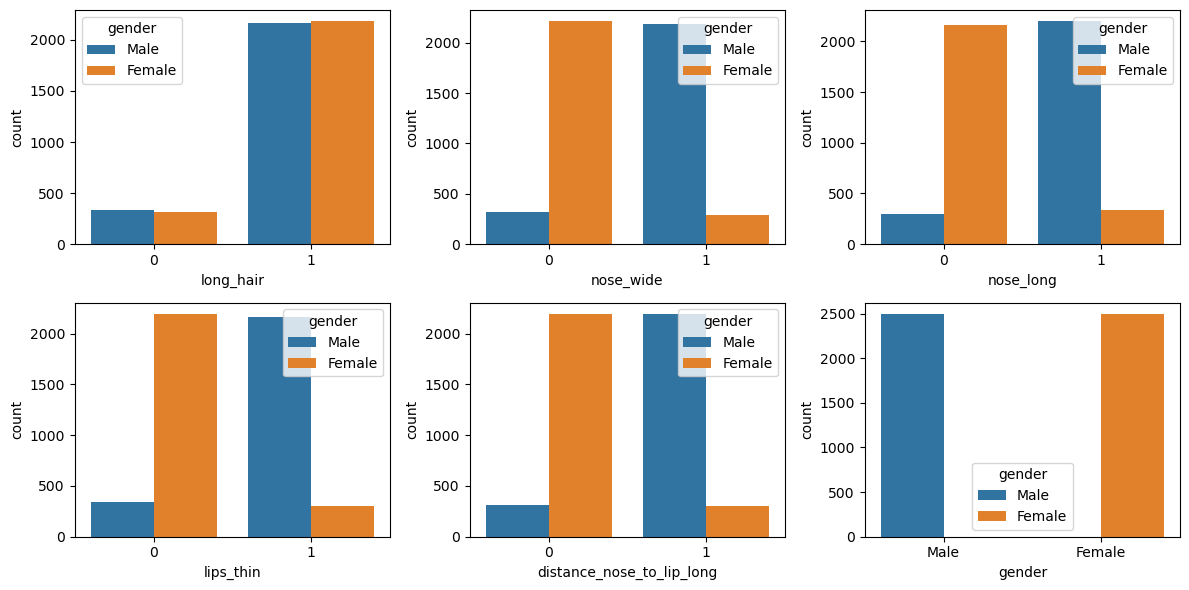

In [14]:
plt.figure(figsize=(12,6))
x=1
for i in list:
    plt.subplot(2,3,x)
    sns.countplot(x=i,hue='gender',data=data)
    x = x + 1
plt.tight_layout()

# 2.Male has more count of "wide nose==1"
# 3.Male has more count of "long nose==1"
# 4.Male has more count of "thin lips==1"
# 5. Male has high count for "distance between nose to lip==1"

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [25]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])

In [27]:
x=data.drop(columns=['long_hair'],axis=1)
x.head()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
1,14.0,5.4,0,0,1,0,0
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
4,13.5,5.9,0,0,0,0,0


In [28]:
features=x.drop(columns=['gender'],axis=1)
y=x['gender']
features

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,11.8,6.1,1,0,1,1
1,14.0,5.4,0,0,1,0
2,11.8,6.3,1,1,1,1
3,14.4,6.1,0,1,1,1
4,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0
4997,11.9,5.4,0,0,0,0
4998,12.9,5.7,0,0,0,0
4999,13.2,6.2,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
m=AdaBoostClassifier()
m.fit(x_train,y_train)
prediction=m.predict(x_test)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       513
           1       0.95      0.98      0.96       488

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [31]:
print(m.predict([[11.8,6.1,1,0,1,1]]))

[1]


C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [32]:
print(m.predict([[13.5,5.9,0,0,0,0]]))

[0]


C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [33]:
print(m.predict([[16.5,5.9,0,0,0,1]]))

[1]


C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [34]:
x.query('gender==1')[['forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long','gender']].head(50)

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
5,13.0,6.8,1,1,1,1,1
6,15.3,6.2,1,1,1,0,1
10,12.5,5.4,1,1,1,1,1
11,15.5,5.8,1,1,1,1,1
12,14.7,5.2,1,1,1,1,1
13,14.5,6.7,0,1,1,1,1
15,12.5,5.2,1,1,1,1,1


In [35]:
print(m.predict([[10.8,6.1,0,0,0,1]]))

[0]


C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
